In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
furniture = pd.read_csv("trash-data-melbourne-grouped-2.csv")
furniture['Date'].min(), furniture['Date'].max()

('2014/01/03', '2017/12/30')

In [7]:
#cols = ['Row ID', 'Latitude', 'Longitude', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#cols = ['Row ID','Latitude','Longitude']
#furniture.drop(cols, axis=1, inplace=True)
#furniture = furniture.sort_values('Order Date')
#furniture = furniture.sort_values('Date')
#furniture.isnull().sum()
#furniture.head()
furniture['Date'] = pd.to_datetime(furniture['Date'],dayfirst=True,infer_datetime_format=True)
furniture = furniture.sort_values('Date')
furniture.isnull().sum()
furniture.head()

,Date,Fills
0,2014-01-03,0
1,2014-01-04,3
2,2014-01-05,1
3,2014-01-06,3
4,2014-01-07,3


In [8]:
#furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Date')['Fills'].sum().reset_index()
furniture.head()

,Date,Fills
0,2014-01-03,0
1,2014-01-04,3
2,2014-01-05,1
3,2014-01-06,3
4,2014-01-07,3


In [9]:
#furniture = furniture.set_index('Order Date')
furniture = furniture.set_index('Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [25]:
#y = furniture['Fills'].resample('MS').mean()
#y['2017':]
#y=furniture

In [14]:
furniture.dropna(inplace=True)
#y=furniture['Fills'].resample('D').mean()
#y.dropna()
#y['2017':].plot(figsize=(20, 8))
#y['2017':].plot()
#plt.show()
y['2017':]

Date
2017-01-01    0.0
2017-01-02    1.0
2017-01-03    0.0
2017-01-04    NaN
2017-01-05    NaN
2017-01-06    1.0
2017-01-07    1.0
2017-01-08    0.0
2017-01-09    0.0
2017-01-10    NaN
2017-01-11    NaN
2017-01-12    1.0
2017-01-13    2.0
2017-01-14    0.0
2017-01-15    1.0
2017-01-16    2.0
2017-01-17    NaN
2017-01-18    NaN
2017-01-19    0.0
2017-01-20    2.0
2017-01-21    0.0
2017-01-22    1.0
2017-01-23    3.0
2017-01-24    3.0
2017-01-25    NaN
2017-01-26    3.0
2017-01-27    2.0
2017-01-28    2.0
2017-01-29    2.0
2017-01-30    1.0
             ... 
2017-12-01    2.0
2017-12-02    3.0
2017-12-03    1.0
2017-12-04    0.0
2017-12-05    3.0
2017-12-06    3.0
2017-12-07    3.0
2017-12-08    2.0
2017-12-09    1.0
2017-12-10    1.0
2017-12-11    1.0
2017-12-12    NaN
2017-12-13    1.0
2017-12-14    2.0
2017-12-15    0.0
2017-12-16    3.0
2017-12-17    3.0
2017-12-18    1.0
2017-12-19    0.0
2017-12-20    2.0
2017-12-21    0.0
2017-12-22    3.0
2017-12-23    3.0
2017-12-24    1.0
2017-

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

AttributeError: 'Index' object has no attribute 'inferred_freq'

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593245884702
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.2086741447833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809126
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.580913309711
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.988487694687
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.256448915547
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2028404680511
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


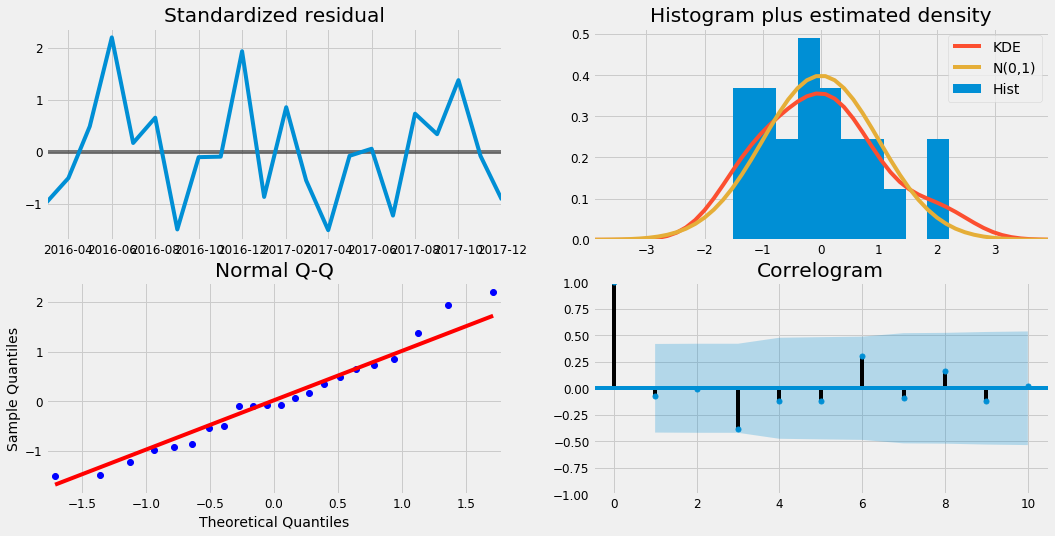

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

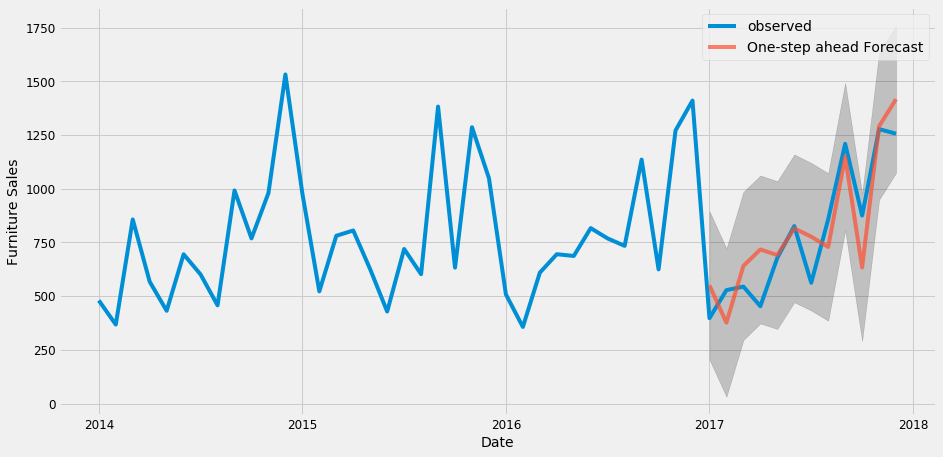

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


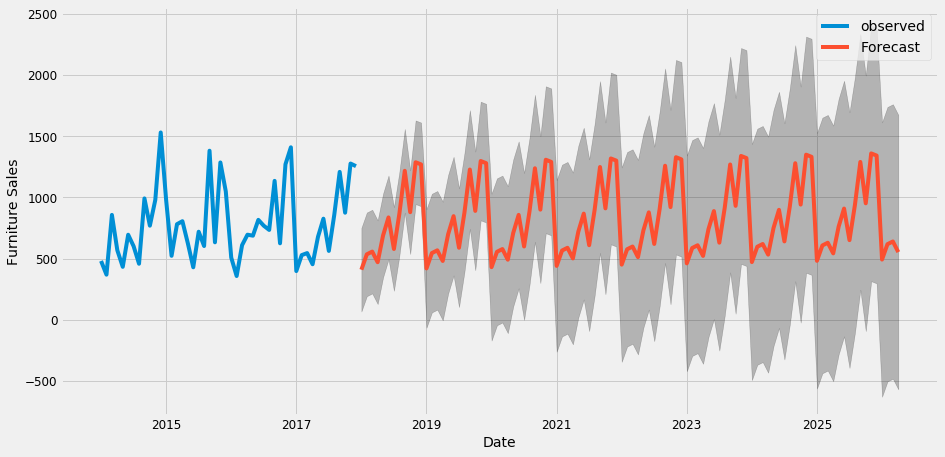

In [23]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [24]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))